In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import datetime as dt
from dateutil.parser import parse
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.optimize import newton
#from scipy.special import psi, polygamma
from scipy.stats import norm, kde, kstest
from numpy import inf,linspace
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('google_drive_nanreplaced.csv')

In [2]:
df.head()

,time,1day_active_users,1day_google_documents_active_users,1day_google_drawings_active_users,1day_google_forms_active_users,1day_google_presentations_active_users,1day_google_sites_active_users,1day_google_spreadsheets_active_users,1day_other_types_active_users,30day_active_users,...,owned_items_with_visibility_unknown_delta,owned_items_with_visibility_unknown_removed,owned_other_types_added,owned_other_types_created,owned_other_types_delta,owned_other_types_edited,owned_other_types_removed,owned_other_types_trashed,owned_other_types_viewed,sharers
0,2017-03-12 05:00:00,1543.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,3509.0,0.0,193.0,0.0,173.0,1173.0,0.0
1,2017-03-14 04:00:00,2495.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,6275.0,0.0,837.0,0.0,1018.0,1759.0,0.0
2,2017-03-16 04:00:00,2403.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,22084.0,0.0,820.0,0.0,805.0,1451.0,0.0
3,2017-03-19 04:00:00,2848.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,51355.0,0.0,725.0,0.0,737.0,1247.0,0.0
4,2017-03-20 04:00:00,5302.0,2499.954068,7.240157,54.104987,474.077428,25.604369,1107.56168,1314.187664,15955.695538,...,0.0,0.0,0.0,9979.0,0.0,1330.0,0.0,924.0,2339.0,0.0


In [3]:
data1= df[['time', 'google_sites_created']]
data2= df[['time', 'google_sites_edited']]
data3= df['google_forms_created']
data1.head()

,time,google_sites_created
0,2017-03-12 05:00:00,3.131068
1,2017-03-14 04:00:00,3.131068
2,2017-03-16 04:00:00,3.131068
3,2017-03-19 04:00:00,3.131068
4,2017-03-20 04:00:00,3.131068


In [4]:
data1.describe()

,google_sites_created
count,831.000000
mean,3.131068
std,3.256305
min,0.000000
25%,2.000000
50%,3.131068
75%,3.131068
max,61.000000


In [16]:
data1= df[['time', 'collaborators']]
data2= df[['time', 'consumers']]
data3= df[['time','creators']]
data1.head()

,time,collaborators
0,2017-03-12 05:00:00,0.0
1,2017-03-14 04:00:00,0.0
2,2017-03-16 04:00:00,0.0
3,2017-03-19 04:00:00,0.0
4,2017-03-20 04:00:00,0.0


In [7]:
data1.describe()

,collaborators
count,831.000000
mean,855.711140
std,610.390444
min,0.000000
25%,403.500000
50%,705.000000
75%,1253.000000
max,2775.000000


In [8]:
data2.describe()

,consumers
count,831.000000
mean,3269.492228
std,1912.606517
min,0.000000
25%,1813.500000
50%,2914.000000
75%,4762.500000
max,8030.000000


In [9]:
data3.describe()

count     831.000000
mean     1235.638601
std       778.993640
min         0.000000
25%       650.500000
50%      1076.000000
75%      1808.500000
max      3376.000000
Name: creators, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70ABD8FD0>]],
      dtype=object)

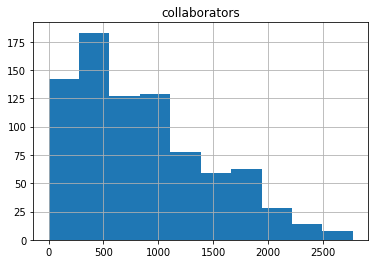

In [10]:
data1.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70ABD8CC0>]],
      dtype=object)

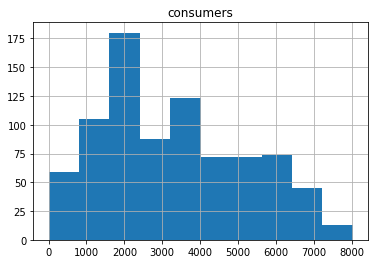

In [11]:
data2.hist()

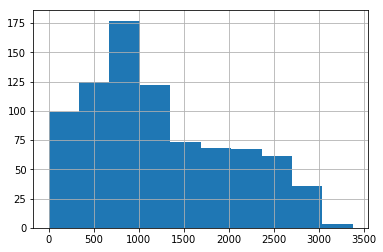

In [12]:
data3.hist()

Text(0.5, 0, 'Year')

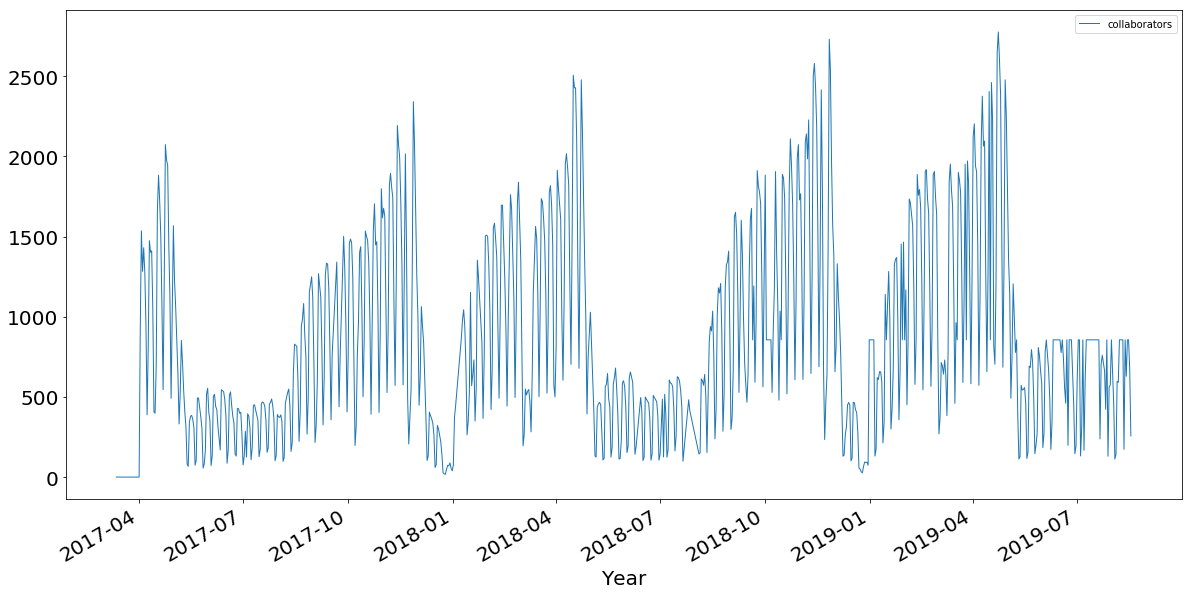

In [13]:
data1['time'] = pd.to_datetime(data1['time'],utc=True)
data1.set_index('time', inplace=True)
data1.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

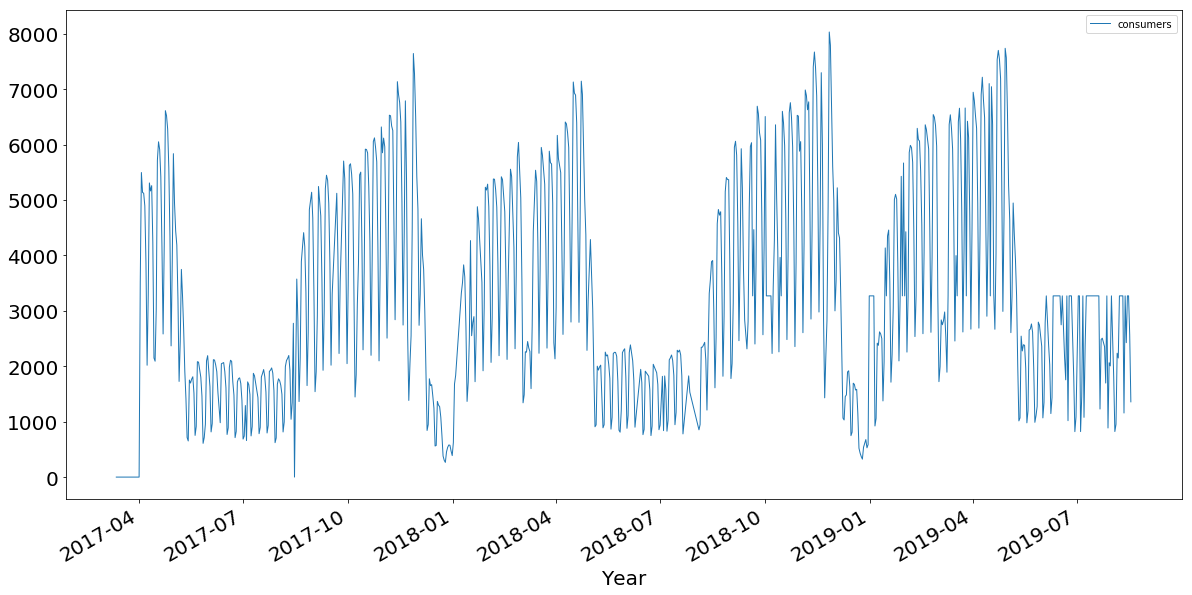

In [14]:
data2['time'] = pd.to_datetime(data2['time'],utc=True)
data2.set_index('time', inplace=True)
data2.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

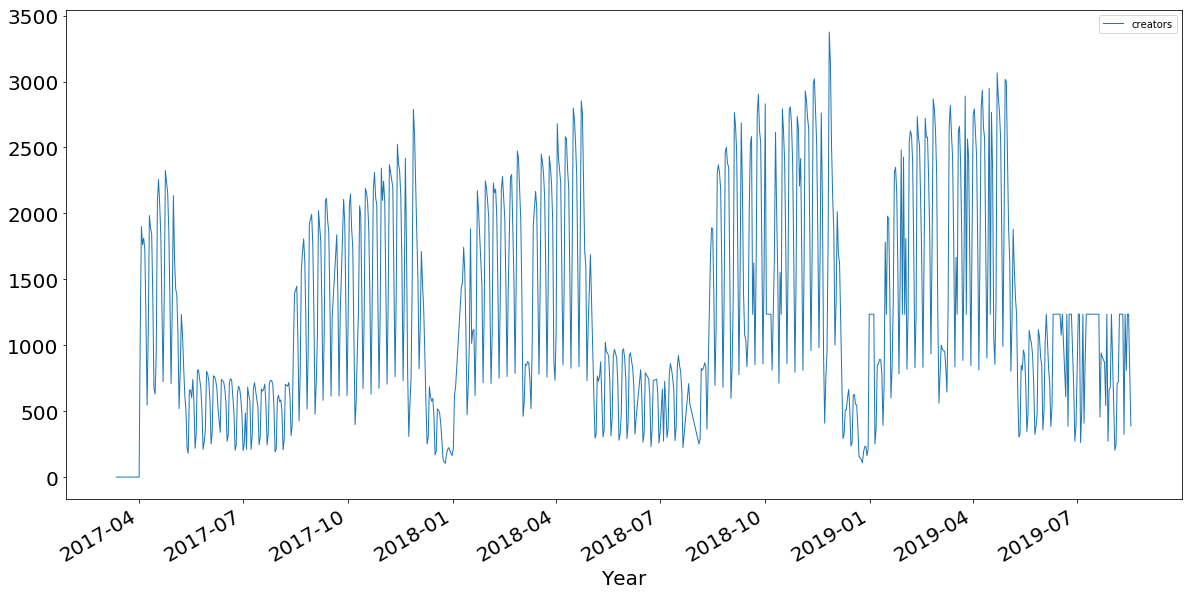

In [17]:
data3['time'] = pd.to_datetime(data3['time'],utc=True)
data3.set_index('time', inplace=True)
data3.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [18]:
alpha= norm.fit(df['collaborators'])[0]
beta= norm.fit(df['collaborators'])[1]
oiu= df['collaborators']
density= kde.gaussian_kde(oiu,bw_method=None)

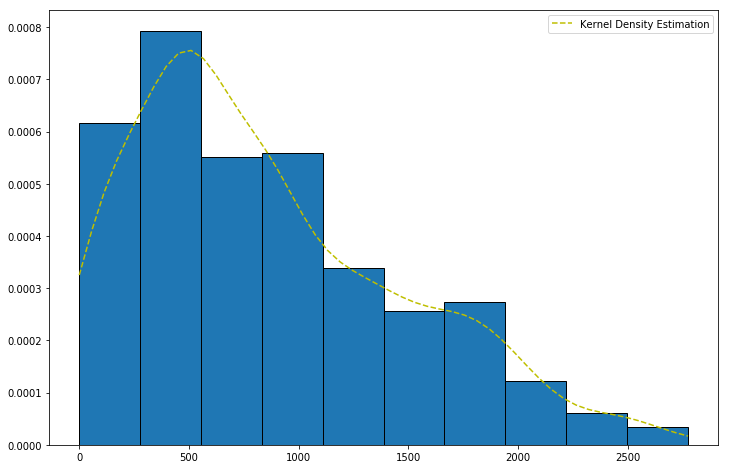

In [19]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [20]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [21]:
kstest(oiu,my_cdf)

KstestResult(statistic=0.04275079762002121, pvalue=0.09317184379953658)

In [22]:
alpha= norm.fit(df['consumers'])[0]
beta= norm.fit(df['consumers'])[1]
oiu= df['consumers']
density= kde.gaussian_kde(oiu,bw_method=None)

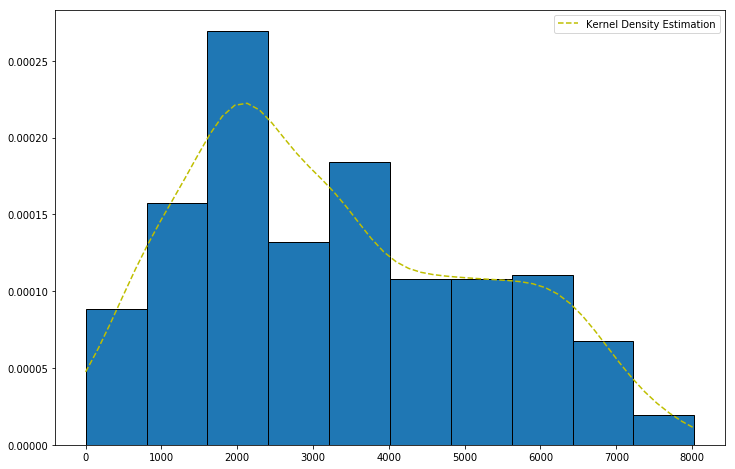

In [23]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [24]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.03786727014236779, pvalue=0.17988823922445674)

In [25]:
alpha= norm.fit(df['creators'])[0]
beta= norm.fit(df['creators'])[1]
oiu= df['creators']
density= kde.gaussian_kde(oiu,bw_method=None)

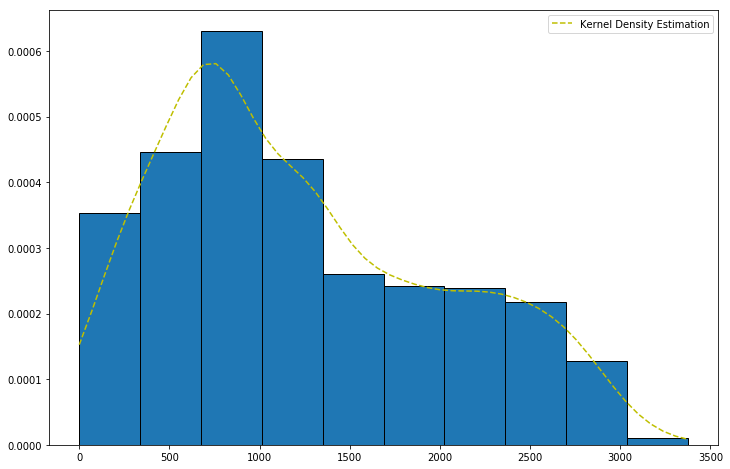

In [26]:
import numpy as np
oiu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, oiu.max())
xgrid = np.linspace(x.min(), x.max(), 100)
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l3])

In [27]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])
kstest(oiu,my_cdf)

KstestResult(statistic=0.037530537368088646, pvalue=0.18768636208762568)

In [28]:
data1= df['collaborators']
users_sample= np.random.choice(a= data1,size= 300)
print(users_sample.mean())

852.3440759930917


In [29]:
data1.mean()-users_sample.mean()

3.367063903283565

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70D744048>]],
      dtype=object)

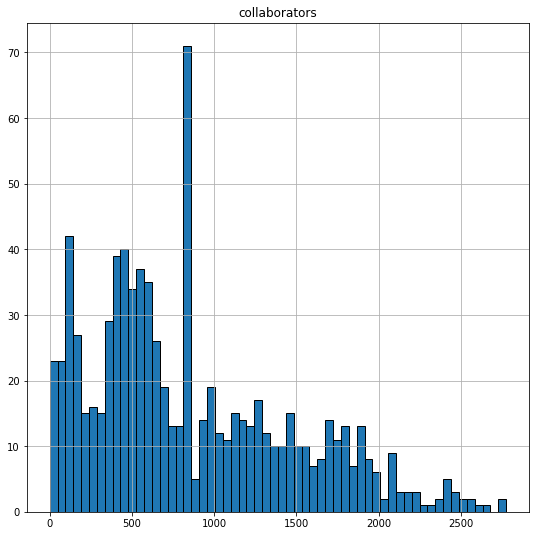

In [30]:
pd.DataFrame(data1).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70D7C42B0>]],
      dtype=object)

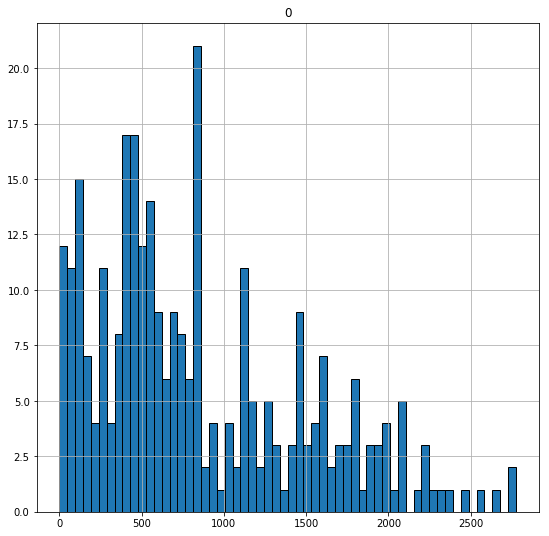

In [31]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

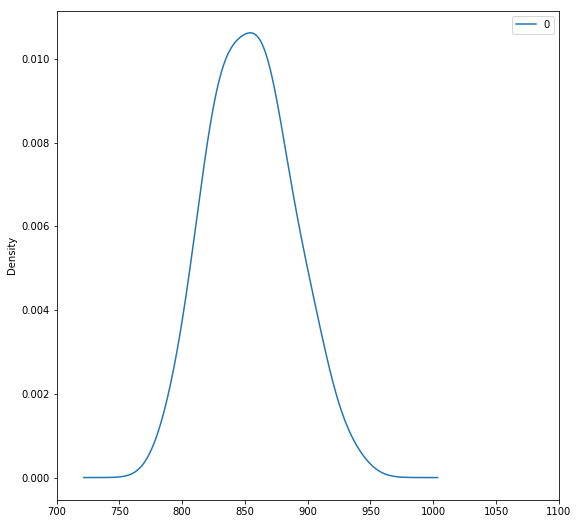

In [34]:
point_estimates = []         # Make empty list to hold point estimates
data1=df['collaborators']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data1, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(700,1100)) 

In [35]:
data1.mean()- np.array(point_estimates).mean()

1.1137897236636718

In [36]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
873.8859283246979
Confidence interval:
(804.8150164087343, 942.9568402406616)


In [37]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data1, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

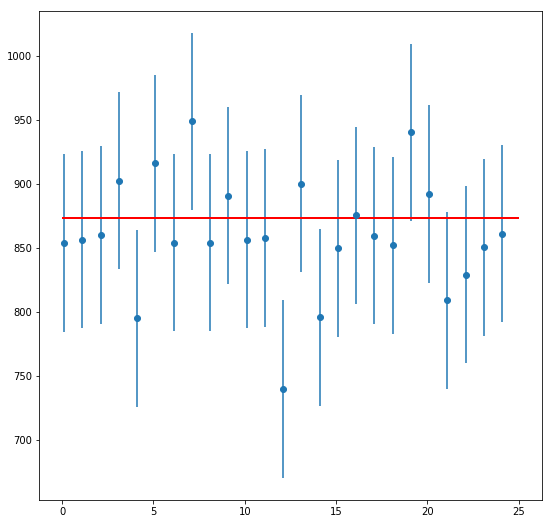

In [39]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=873, 
           linewidth=2.0,
           color="red")

In [40]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data1, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(802.0928483531159, 945.67900829628)


In [41]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 199) - stats.norm.ppf(0.975)

0.011992559709340878

In [42]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 199,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(801.9459417961045, 945.8259148532914)

In [68]:
data2= df['consumers']
users_sample= np.random.choice(a= data2,size= 300)
print(users_sample.mean())

3294.007737478411


In [69]:
data2.mean()-users_sample.mean()

-24.515509499127347

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7109C9438>]],
      dtype=object)

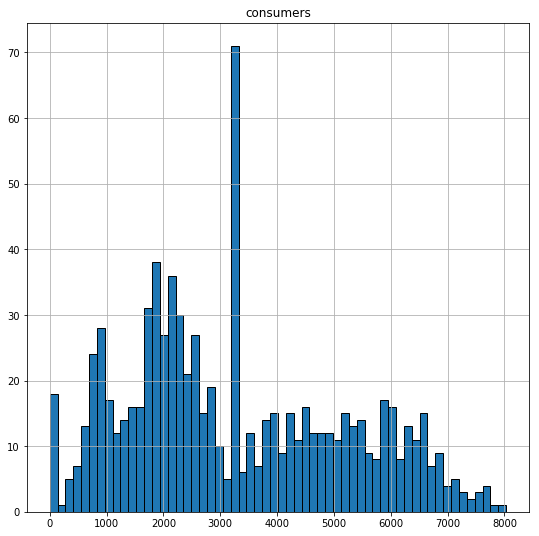

In [70]:
pd.DataFrame(data2).hist(bins=58,figsize=(9,9), ec='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70EBB99B0>]],
      dtype=object)

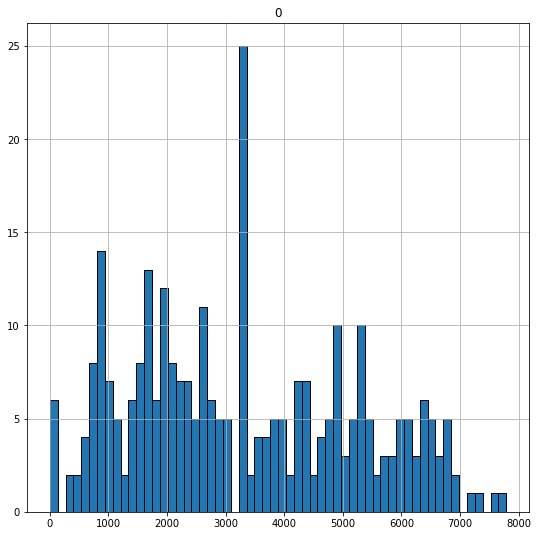

In [48]:
pd.DataFrame(users_sample).hist(bins=58,figsize=(9,9), ec='black')

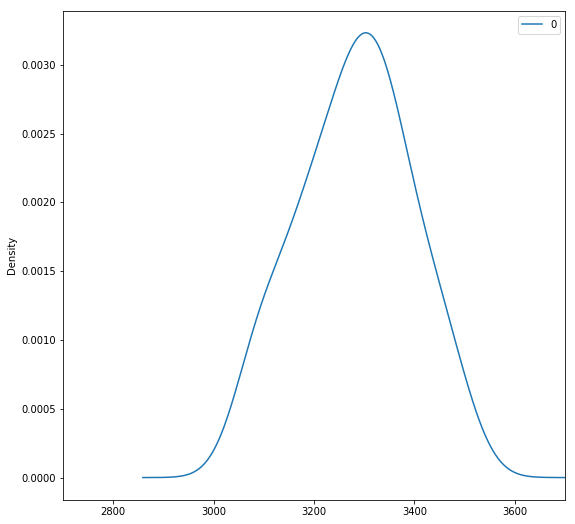

In [59]:
point_estimates = []         # Make empty list to hold point estimates
data2=df['consumers']
for x in range(50):         # Generate 200 samples
    sample = np.random.choice(a= data2, size=300)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(2700,3700)) 

In [60]:
data2.mean()- np.array(point_estimates).mean()

-12.179987910180898

In [61]:

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

users_stdev = data1.std()  # Get the population standard deviation

margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Sample Mean:")
print(sample_mean)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Sample Mean:
3171.711433506045
Confidence interval:
(2955.283608509781, 3388.139258502309)


In [62]:
np.random.seed(12)

sample_size = 300

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= data2, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    users_stdev = data1.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (users_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

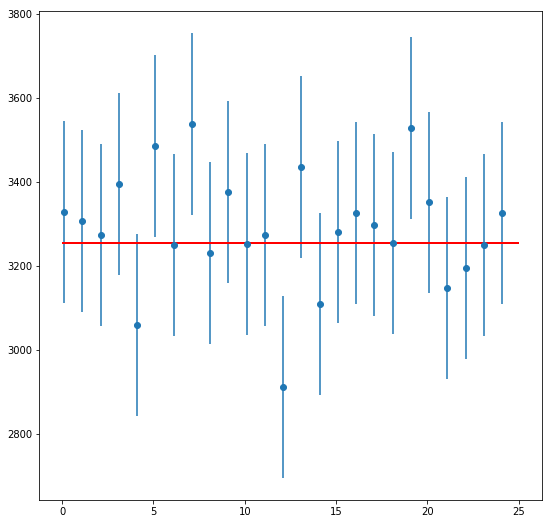

In [63]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=3255, 
           linewidth=2.0,
           color="red")

In [64]:
np.random.seed(10)

sample_size = 300
sample = np.random.choice(a= data2, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=299)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9679296690653618
Confidence interval:
(3080.7503708527547, 3522.1250004771246)


In [65]:
# Check the difference between critical values with a sample size of 200
             
stats.t.ppf(q=0.975, df= 199) - stats.norm.ppf(0.975)

0.011992559709340878

In [66]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 199,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(3080.298789535893, 3522.5765817939864)

In [67]:
data3= df['creators']
users_sample= np.random.choice(a= data3,size= 300)
print(users_sample.mean())

1203.1634974093263
